<a href="https://colab.research.google.com/github/dlguswn3659/2020_Image_Lab/blob/master/hair_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

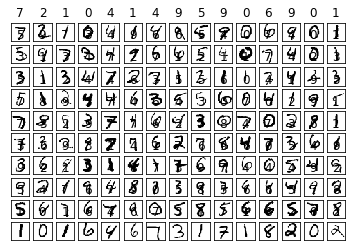

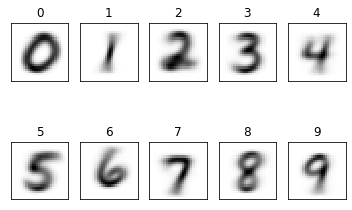

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
import operator
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
import csv
import math
# from google.colab import files

# uploaded = files.upload()

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()



In [ ]:
theta = np.random.normal(size=(size_row*size_col))

In [ ]:
def sigmoid(z): 
  g = 1 / (1 + np.exp(-z)) 
  
  return g 

In [ ]:
z_list = []
for i in range(0, 10):
  z_list.append(0.0)

print(z_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
for i in range(0, num_image):
  label       = list_label[i]
  im_vector   = list_image[:, i]
  im_matrix   = im_vector.reshape((size_row, size_col))
  y = 0
  for ny in range(0, size_row):
      for nz in range(0, size_col):
        y = y + theta[size_col*ny + nz]*im_matrix[ny][nz]
  # print(y)
  z_list[label] = z_list[label] + sigmoid(y)
  # print(sigmoid(y))

In [ ]:
#평균내기

# for i in range(0, 10):
  # z_list[i] = z_list[i] / label_list[i]

In [ ]:
#first hidden layer로 가기 위한 초기 fully connected u 생성
w_tmp = np.ones(shape=(1000, 197, 785))
v_tmp = np.ones(shape=(1000, 50, 197))
u_tmp = np.ones(shape=(1000, 10, 50))

matrix_u = np.zeros((197, 785))  #197줄
matrix_u[0][0] = 1               #y레이어의 bias를 위한 값 1

for i in range(1, 197):
  for j in range(0, 785):
    matrix_u[i][j] = np.random.normal()


# matrix_u[196][0] = 0            #줄, 칸
##############################################
matrix_v = np.zeros((50, 197))  #50줄
matrix_v[0][0] = 1               #y레이어의 bias를 위한 값 1

for i in range(1, 50):
  for j in range(0, 197):
    matrix_v[i][j] = np.random.normal()


# matrix_v[196][0] = 0            #줄, 칸
##############################################
matrix_w = np.zeros((10, 50))  #10줄
# matrix_w[0][0] = 1               #y레이어의 bias를 위한 값 1

for i in range(0, 10):
  for j in range(0, 50):
    matrix_w[i][j] = np.random.normal()

w_tmp = matrix_w
v_tmp = matrix_v
u_tmp = matrix_u

# matrix_w[196][0] = 0            #줄, 칸

# print(matrix)

In [ ]:
import operator

y_ = np.ones((197, 1))

x_list = np.ones(shape=(1000, 785, 1))

y__list = np.ones(shape=(1000, 197, 1))
z__list = np.ones(shape=(1000, 50, 1))
h__list = np.ones(shape=(1000, 10, 1))

y_list = np.ones(shape=(1000, 197, 1))
z_list = np.ones(shape=(1000, 50, 1))
h_list = np.ones(shape=(1000, 10, 1))
l_list = np.zeros(shape=(1000, 10, 1))

y_list_tmp = np.ones(shape=(1000, 197, 1))
z_list_tmp = np.ones(shape=(1000, 50, 1))
h_list_tmp = np.ones(shape=(1000, 10, 1))
y__list_tmp = np.ones(shape=(1000, 197, 1))
z__list_tmp = np.ones(shape=(1000, 50, 1))
h__list_tmp = np.ones(shape=(1000, 10, 1))



# w_tmp = np.ones(shape=(1000, 197, 785))
# v_tmp = np.ones(shape=(1000, 50, 197))
# u_tmp = np.ones(shape=(1000, 10, 50))

# matrix_u = np.zeros((197, 785))  #197줄
# matrix_u[0][0] = 1               #y레이어의 bias를 위한 값 1


#training set 1000개에 대해서
for i in range(0, 1000):
  # print(i)
  label       = list_label[i]
  bias   = [1]       #bias 1
  im_vector = np.concatenate((bias, list_image[:, i]), axis = None)

  # print(type(list_image[: , i]))
  # print(list_image[:, i])
  # print(im_vector)
  im_matrix   = im_vector.reshape((size_row*size_col + 1, 1))
  
  x_list[i] = im_matrix

  y_ = np.dot(matrix_u, im_matrix)  #x와 가중치 u를 곱해서 y_를 만듦
  y__list[i] = y_
  
  y_vector = np.ones((197,1)) #bias
  for j in range (1, 197):
    y_vector[j][0] = 1 / (1 + math.exp(-y_[j][0]))
    # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  y   = y_vector.reshape((197, 1))
  y_list[i] = y

  z_  = np.dot(matrix_v, y)  #y와 가중치 v를 곱해서 z_를 만듦
  z__list[i] = z_
  z_vector = np.ones((50,1)) #bias
  for j in range (1, 50):
    z_vector[j][0] = 1 / (1 + math.exp(-z_[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  z   = z_vector.reshape((50, 1))
  z_list[i] = z
  
  # print(z)

  h_  = np.dot(matrix_w, z)  #z와 가중치 w를 곱해서 h_를 만듦
  h__list[i] = h_
  
  h_vector = np.ones((10,1)) #bias
  for j in range (0, 10):
    h_vector[j][0] = 1 / (1 + math.exp(-h_[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

  h   = h_vector.reshape((10, 1))
  # tmp = h.ravel()
  # max_value = max(tmp)
  # print(max_value)
  # max_index = tmp.index(max_value)
  index, value = max(enumerate(h), key=operator.itemgetter(1))
  h_list[i] = h
  l_list[i][index] = 1
  # print(l_list[i])
  # print(h)

  y_list_tmp[i] = y_list[i]
  z_list_tmp[i] = z_list[i]
  h_list_tmp[i] = h_list[i]
  y__list_tmp[i] = y__list[i]
  z__list_tmp[i] = z__list[i]
  h__list_tmp[i] = h__list[i]

# print(l_list)

In [ ]:
import operator

y_2 = np.ones((197, 1))

x_list2 = np.ones(shape=(9000, 785, 1))

y__list2 = np.ones(shape=(9000, 197, 1))
z__list2 = np.ones(shape=(9000, 50, 1))
h__list2 = np.ones(shape=(9000, 10, 1))

y_list2 = np.ones(shape=(9000, 197, 1))
z_list2 = np.ones(shape=(9000, 50, 1))
h_list2 = np.ones(shape=(9000, 10, 1))
l_list2 = np.zeros(shape=(9000, 10, 1))

y_list_tmp2 = np.ones(shape=(9000, 197, 1))
z_list_tmp2 = np.ones(shape=(9000, 50, 1))
h_list_tmp2 = np.ones(shape=(9000, 10, 1))
y__list_tmp2 = np.ones(shape=(9000, 197, 1))
z__list_tmp2 = np.ones(shape=(9000, 50, 1))
h__list_tmp2 = np.ones(shape=(9000, 10, 1))

# w_tmp = np.ones(shape=(9000, 197, 785))
# v_tmp = np.ones(shape=(9000, 50, 197))
# u_tmp = np.ones(shape=(9000, 10, 50))

# matrix_u = np.zeros((197, 785))  #197줄
# matrix_u[0][0] = 1               #y레이어의 bias를 위한 값 1


#training set 1000개에 대해서
for i in range(0, 9000):
  # print(i)
  label2       = list_label[i + 1000]
  bias2   = [1]       #bias 1
  im_vector2 = np.concatenate((bias2, list_image[:, i + 1000]), axis = None)

  # print(type(list_image[: , i]))
  # print(list_image[:, i])
  # print(im_vector)
  im_matrix2   = im_vector2.reshape((size_row*size_col + 1, 1))
  
  x_list2[i] = im_matrix2

  y_2 = np.dot(matrix_u, im_matrix)  #x와 가중치 u를 곱해서 y_를 만듦
  y__list2[i] = y_2
  
  y_vector2 = np.ones((197,1)) #bias
  for j in range (1, 197):
    y_vector2[j][0] = 1 / (1 + math.exp(-y_2[j][0]))
    # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  y2   = y_vector2.reshape((197, 1))
  y_list2[i] = y2

  z_2  = np.dot(matrix_v, y2)  #y와 가중치 v를 곱해서 z_를 만듦
  z__list2[i] = z_2
  z_vector2 = np.ones((50,1)) #bias
  for j in range (1, 50):
    z_vector2[j][0] = 1 / (1 + math.exp(-z_2[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  z2   = z_vector2.reshape((50, 1))
  z_list2[i] = z2
  
  # print(z)

  h_2  = np.dot(matrix_w, z2)  #z와 가중치 w를 곱해서 h_를 만듦
  h__list2[i] = h_2
  
  h_vector2 = np.ones((10,1)) #bias
  for j in range (0, 10):
    h_vector2[j][0] = 1 / (1 + math.exp(-h_2[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

  h2   = h_vector2.reshape((10, 1))
  # tmp = h.ravel()
  # max_value = max(tmp)
  # print(max_value)
  # max_index = tmp.index(max_value)
  index2, value2 = max(enumerate(h2), key=operator.itemgetter(1))
  h_list2[i] = h2
  l_list2[i][index2] = 1
  # print(l_list[i])
  # print(h)

  y_list_tmp2[i] = y_list2[i]
  z_list_tmp2[i] = z_list2[i]
  h_list_tmp2[i] = h_list2[i]
  y__list_tmp2[i] = y__list2[i]
  z__list_tmp2[i] = z__list2[i]
  h__list_tmp2[i] = h__list2[i]

# print(l_list)

In [ ]:
def objective_function(size, label_List, h_List):
  result = 0.0
  for i in range(0, size):
    for k in range(0, 10):
      result = result + ((-1)*label_List[i][k]*math.log(h_List[i][k][0]) - (1-label_List[i][k])*math.log(1-h_List[i][k][0]))
  result = result / size

  return result

In [ ]:
def w_gredient_descent(learning_rate, k_value, n_value, size, label_List):
  result = 0.0
  for i in range(0, size):
    result = result + (z_list_tmp[i][n_value][0]*(sigmoid(h_list_tmp[i][k_value][0]) - label_List[i][k_value][0]))
  result = result / size
  result = result * learning_rate
  final = w_tmp[k_value][n_value] - result

  return final

In [ ]:
def v_gredient_descent(learning_rate, k_value, n_value, size, label_List):
  result = 0.0
  for i in range(0, size):
    result = result + (y_list_tmp[i][n_value][0]*w_tmp[0][k_value]*(sigmoid(h_list_tmp[i][0][0]) - label_List[i][0][0])*(sigmoid(z__list_tmp[i][k_value][0])*(1 - sigmoid(z__list_tmp[i][k_value][0]))))
  result = result / size
  result = result * learning_rate
  final = v_tmp[k_value][n_value] - result

  return final

In [ ]:
def u_gredient_descent(learning_rate, k_value, n_value, size, label_List):
  result = 0.0
  for i in range(0, size):
    result = result + (x_list[i][n_value][0]*w_tmp[0][1]*v_tmp[1][k_value]*(sigmoid(h_list_tmp[i][0][0]) - label_List[i][0][0])*(sigmoid(z__list_tmp[i][1][0])*(1 - sigmoid(z__list_tmp[i][1][0])))*(sigmoid(y__list_tmp[i][k_value][0])*(1 - sigmoid(y__list_tmp[i][k_value][0]))))
  result = result / size
  result = result * learning_rate
  final = u_tmp[k_value][n_value] - result

  return final

In [ ]:
#이제 여기에다가

#iteration에 따라
#cost function 값을 배열에 저장하고
#세타값을 업데이트 시키고(위의 세개 함수 호출)
#업데이트 시킨값을 다시 cost함수에 넣고
#업데이트 시키고
#이것을 반복하는 함수를 짠다.

#아직 해야하는 것 : h값에 따라 가장 큰값의 index로 L값정하는거 위에 추가해야함.

iteration = 400
l_r = 0.6
lambda_ = 1

cost_history = np.zeros(iteration)

total_number_of_predictions = 1000
accuracy_history = np.zeros(iteration)

# small_delta = np.ones(3)  #image_size, layer 2~4(3개)
# greece_delta_w = np.ones(shape = (10, 50))
# greece_delta_v = np.ones(shape = (50, 197))
# greece_delta_u = np.ones(shape = (197, 785))

label_group = np.zeros(shape = (1000, 10))

for i in range(0, 1000):
  label       = list_label[i]
  im_vector   = list_image[:, i]

  # X[i] = im_vector
  # print(i)
  # print(X[i])
  label_group[i][label] = 1

#####################################

cost_history2 = np.zeros(iteration)

total_number_of_predictions2 = 9000
accuracy_history2 = np.zeros(iteration)

# small_delta = np.ones(3)  #image_size, layer 2~4(3개)
# greece_delta_w = np.ones(shape = (10, 50))
# greece_delta_v = np.ones(shape = (50, 197))
# greece_delta_u = np.ones(shape = (197, 785))

label_group2 = np.zeros(shape = (9000, 10))

for i in range(1000, 10000):
  label2       = list_label[i]
  im_vector2   = list_image[:, i]

  # X[i] = im_vector
  # print(i)
  # print(X[i])
  label_group2[i - 1000][label2] = 1

#############################################


for t in range(0, iteration):
  number_of_correct_predictions = 0
  
  print(t, end=' ')

  parameter_sum = 0

  for q in range(0, 785):
    for w in range(1, 197):
      parameter_sum = parameter_sum + matrix_u[w][q]**2

  for q in range(0, 197):
    for w in range(1, 50):
      parameter_sum = parameter_sum + matrix_u[w][q]**2

  for q in range(0, 50):
    for w in range(0, 10):
      parameter_sum = parameter_sum + matrix_u[w][q]**2

  # for q in range(1, 785):
  #   for w in range(1, 197):
  #     for e in range(1, 50):
  #       matrix_u
  # parameter_sum = matrix_u**2 + matrix_v**2 + matrix_w**2
  # print(parameter_sum.shape)

  # cost_history[t] = objective_function(1000, l_list, h_list_tmp)
  result = 0.0
  for i in range(0, 1000):
    for k in range(0, 10):
      # if h_list_tmp[i][k][0] <= 0:
      # print(h_list_tmp[i][k][0])
      result = result + ((-1)*label_group[i][k]*math.log(h_list[i][k][0]) - (1-label_group[i][k])*math.log(1-h_list[i][k][0])) + ((lambda_)/(2 * 164995)) * parameter_sum
  result = result / 1000
  cost_history[t] = result

# (1 / (1 + math.exp(-y__list_tmp[i][m][0])))
#############################################
  # for m in range(0, 10):
  #   # print(m)
  #   for n in range(0, 50):
  #     # matrix_w[m][n] = w_gredient_descent(l_r, m, n, 1000, l_list)
  #     result = 0.0
  #     for i in range(0,1000):
  #       result = result + (z_list_tmp[i][n][0]*((1 / (1 + math.exp(-h_list_tmp[i][m][0]))) - l_list[i][m][0]))
  #     result = result / 1000
  #     result = result * l_r
  #     final = w_tmp[m][n] - result
  #     matrix_w[m][n] = final

  # for m in range(0, 50):
  #   # print(m)
  #   for n in range(0, 197):
  #     # matrix_v[m][n] = v_gredient_descent(l_r, m, n, 1000, l_list)
  #     result = 0.0
  #     for i in range(0, 1000):
  #       result = result + (y_list_tmp[i][n][0]*w_tmp[0][m]*((1 / (1 + math.exp(-h_list_tmp[i][0][0]))) - l_list[i][0][0])*((1 / (1 + math.exp(-z__list_tmp[i][m][0])))*(1 - (1 / (1 + math.exp(-z__list_tmp[i][m][0]))))))
  #     result = result / 1000
  #     result = result * l_r
  #     final = v_tmp[m][n] - result
  #     matrix_v[m][n] = final

  # for m in range(0, 197):
  #   # print(m)
  #   for n in range(0, 785):
  #     # matrix_u[m][n] = u_gredient_descent(l_r, m, n, 1000, l_list)
  #     result = 0.0
  #     for i in range(0, 1000):
  #       result = result + (x_list[i][n][0]*w_tmp[0][1]*v_tmp[1][m]*((1 / (1 + math.exp(-h_list_tmp[i][0][0]))) - l_list[i][0][0])*((1 / (1 + math.exp(-z__list_tmp[i][1][0])))*(1 - (1 / (1 + math.exp(-z__list_tmp[i][1][0])))))*((1 / (1 + math.exp(-y__list_tmp[i][m][0])))*(1 - (1 / (1 + math.exp(-y__list_tmp[i][m][0]))))))
  #     result = result / 1000
  #     result = result * l_r
  #     final = u_tmp[m][n] - result
  #     matrix_u[m][n] = final
#######################################################################
##gradient descent
  result_w = 0
  result_v = 0
  result_u = 0

  for i in range(0, 1000):
    small_delta_2 = np.zeros(shape = (10, 1))
    for j in range(0, 10):
      small_delta_2[j][0] = h_list[i][j] - label_group[i][j]
    # print(h_list[i])
    # print(label_group[i])
    # small_delta_2 = h_list[i] - label_group[i] #여기 label_group 다시 봐야함.
    small_delta_1 = np.dot(np.transpose(matrix_w), small_delta_2)
    small_delta_0 = np.dot(np.transpose(matrix_v), small_delta_1)*(y_list_tmp[i]*(1 - y_list_tmp[i]))

    # print(small_delta_2)
    result_w = result_w + np.dot(small_delta_2, np.transpose(z_list[i]))
    result_v = result_v + np.dot(small_delta_1, np.transpose(y_list[i]))
    result_u = result_u + np.dot(small_delta_0, np.transpose(x_list[i]))

  matrix_w = matrix_w - (result_w / 1000 *l_r)
  matrix_v = matrix_v - (result_v / 1000 *l_r)
  matrix_u = matrix_u - (result_u / 1000 *l_r)


####################################################################

  for k in range(0, 1000):
  # print(i)
    label       = list_label[k]
    bias   = [1]       #bias 1
    im_vector = np.concatenate((bias, list_image[:, k]), axis = None)

    # print(type(list_image[: , k]))
    # print(list_image[:, k])
    # print(im_vector)
    im_matrix   = im_vector.reshape((size_row*size_col + 1, 1))

    y_ = np.dot(matrix_u, im_matrix)  #x와 가중치 u를 곱해서 y_를 만듦
    y__list[k] = y_
    
    y_vector = np.ones((197,1)) #bias
    for j in range (1, 197):
      y_vector[j][0] = 1 / (1 + math.exp(-y_[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦
    
    # print(y_vector) #시그모이드 값 확인
    y   = y_vector.reshape((197, 1))
    y_list[k] = y

    z_  = np.dot(matrix_v, y)  #y와 가중치 v를 곱해서 z_를 만듦
    z__list[k] = z_
    z_vector = np.ones((50,1)) #bias
    for j in range (1, 50):
      z_vector[j][0] = 1 / (1 + math.exp(-z_[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

    z   = z_vector.reshape((50, 1))
    z_list[k] = z
    
    # print(z)

    h_  = np.dot(matrix_w, z)  #z와 가중치 w를 곱해서 h_를 만듦
    h__list[k] = h_
    
    h_vector = np.ones((10,1)) #bias
    for j in range (0, 10):
      h_vector[j][0] = 1 / (1 + math.exp(-h_[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

    h   = h_vector.reshape((10, 1))
    # print(h)
    # tmp = h.ravel()
    # max_value = max(tmp)
    # print(max_value)
    # max_index = tmp.index(max_value)
    index, value = max(enumerate(h), key=operator.itemgetter(1))
    h_list[k] = h
    l_list[k][index] = 1
    # print(l_list[i])
    # print(h)
    if index == label:
      number_of_correct_predictions = number_of_correct_predictions + 1

    y_list_tmp[k] = y_list[k]
    z_list_tmp[k] = z_list[k]
    h_list_tmp[k] = h_list[k]
    y__list_tmp[k] = y__list[k]
    z__list_tmp[k] = z__list[k]
    h__list_tmp[k] = h__list[k]


  accuracy_history[t] = number_of_correct_predictions/total_number_of_predictions*100
  # print(accuracy_history[t])

############################
  #test data!

  number_of_correct_predictions2 = 0
  
  print(t, end=' ')

  result2 = 0.0
  for i in range(0, 9000):
    for k in range(0, 10):
      # if h_list_tmp[i][k][0] <= 0:
      # print(h_list_tmp[i][k][0])
      result2 = result2 + ((-1)*label_group2[i][k]*math.log(h_list2[i][k][0]) - (1-label_group2[i][k])*math.log(1-h_list2[i][k][0])) + ((lambda_)/(2 * 164995)) * parameter_sum
  result2 = result2 / 9000
  cost_history2[t] = result2


  for k in range(0, 9000):
  # print(i)
    label2       = list_label[k + 1000]
    bias2   = [1]       #bias 1
    im_vector2 = np.concatenate((bias2, list_image[:, k + 1000]), axis = None)

    # print(type(list_image[: , k]))
    # print(list_image[:, k])
    # print(im_vector)
    im_matrix2   = im_vector2.reshape((size_row*size_col + 1, 1))

    y_2 = np.dot(matrix_u, im_matrix2)  #x와 가중치 u를 곱해서 y_를 만듦
    y__list2[k] = y_2
    
    y_vector2 = np.ones((197,1)) #bias
    for j in range (1, 197):
      y_vector2[j][0] = 1 / (1 + math.exp(-y_2[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦
    
    # print(y_vector) #시그모이드 값 확인
    y2   = y_vector2.reshape((197, 1))
    y_list2[k] = y2

    z_2  = np.dot(matrix_v, y2)  #y와 가중치 v를 곱해서 z_를 만듦
    z__list2[k] = z_2
    z_vector2 = np.ones((50,1)) #bias
    for j in range (1, 50):
      z_vector2[j][0] = 1 / (1 + math.exp(-z_2[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

    z2   = z_vector2.reshape((50, 1))
    z_list2[k] = z2
    
    # print(z)

    h_2  = np.dot(matrix_w, z2)  #z와 가중치 w를 곱해서 h_를 만듦
    h__list2[k] = h_2
    
    h_vector2 = np.ones((10,1)) #bias
    for j in range (0, 10):
      h_vector2[j][0] = 1 / (1 + math.exp(-h_2[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

    h2   = h_vector2.reshape((10, 1))
    # print(h)
    # tmp = h.ravel()
    # max_value = max(tmp)
    # print(max_value)
    # max_index = tmp.index(max_value)
    index2, value2 = max(enumerate(h2), key=operator.itemgetter(1))
    h_list2[k] = h2
    l_list2[k][index2] = 1
    # print(l_list[i])
    # print(h)
    if index2 == label2:
      number_of_correct_predictions2 = number_of_correct_predictions2 + 1

    y_list_tmp2[k] = y_list2[k]
    z_list_tmp2[k] = z_list2[k]
    h_list_tmp2[k] = h_list2[k]
    y__list_tmp2[k] = y__list2[k]
    z__list_tmp2[k] = z__list2[k]
    h__list_tmp2[k] = h__list2[k]


  accuracy_history2[t] = number_of_correct_predictions2/total_number_of_predictions2*100
  t = t + 1

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35 36 36 37 37 38 38 39 39 40 40 41 41 42 42 43 43 44 44 45 45 46 46 47 47 48 48 49 49 50 50 51 51 52 52 53 53 54 54 55 55 56 56 57 57 58 58 59 59 60 60 61 61 62 62 63 63 64 64 65 65 66 66 67 67 68 68 69 69 70 70 71 71 72 72 73 73 74 74 75 75 76 76 77 77 78 78 79 79 80 80 81 81 82 82 83 83 84 84 85 85 86 86 87 87 88 88 89 89 90 90 91 91 92 92 93 93 94 94 95 95 96 96 97 97 98 98 99 99 100 100 101 101 102 102 103 103 104 104 105 105 106 106 107 107 108 108 109 109 110 110 111 111 112 112 113 113 114 114 115 115 116 116 117 117 118 118 119 119 120 120 121 121 122 122 123 123 124 124 125 125 126 126 127 127 128 128 129 129 130 130 131 131 132 132 133 133 134 134 135 135 136 136 137 137 138 138 139 139 140 140 141 141 142 142 143 143 144 144 145 145 146 146 147 147 148 148 149 149 150 150 151 151 152 

In [ ]:
# import operator

# y_2 = np.ones((197, 1))

# x_list2 = np.ones(shape=(9000, 785, 1))

# y__list2 = np.ones(shape=(9000, 197, 1))
# z__list2 = np.ones(shape=(9000, 50, 1))
# h__list2 = np.ones(shape=(9000, 10, 1))

# y_list2 = np.ones(shape=(9000, 197, 1))
# z_list2 = np.ones(shape=(9000, 50, 1))
# h_list2 = np.ones(shape=(9000, 10, 1))
# l_list2 = np.zeros(shape=(9000, 10, 1))

# y_list_tmp2 = np.ones(shape=(9000, 197, 1))
# z_list_tmp2 = np.ones(shape=(9000, 50, 1))
# h_list_tmp2 = np.ones(shape=(9000, 10, 1))
# y__list_tmp2 = np.ones(shape=(9000, 197, 1))
# z__list_tmp2 = np.ones(shape=(9000, 50, 1))
# h__list_tmp2 = np.ones(shape=(9000, 10, 1))

# # w_tmp = np.ones(shape=(9000, 197, 785))
# # v_tmp = np.ones(shape=(9000, 50, 197))
# # u_tmp = np.ones(shape=(9000, 10, 50))

# # matrix_u = np.zeros((197, 785))  #197줄
# # matrix_u[0][0] = 1               #y레이어의 bias를 위한 값 1


# #training set 1000개에 대해서
# for i in range(0, 9000):
#   # print(i)
#   label2       = list_label[i + 1000]
#   bias2   = [1]       #bias 1
#   im_vector2 = np.concatenate((bias2, list_image[:, i + 1000]), axis = None)

#   # print(type(list_image[: , i]))
#   # print(list_image[:, i])
#   # print(im_vector)
#   im_matrix2   = im_vector2.reshape((size_row*size_col + 1, 1))
  
#   x_list2[i] = im_matrix2

#   y_2 = np.dot(matrix_u, im_matrix)  #x와 가중치 u를 곱해서 y_를 만듦
#   y__list2[i] = y_2
  
#   y_vector2 = np.ones((197,1)) #bias
#   for j in range (1, 197):
#     y_vector2[j][0] = 1 / (1 + math.exp(-y_2[j][0]))
#     # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

#   y2   = y_vector2.reshape((197, 1))
#   y_list2[i] = y2

#   z_2  = np.dot(matrix_v, y2)  #y와 가중치 v를 곱해서 z_를 만듦
#   z__list2[i] = z_2
#   z_vector2 = np.ones((50,1)) #bias
#   for j in range (1, 50):
#     z_vector2[j][0] = 1 / (1 + math.exp(-z_2[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

#   z2   = z_vector2.reshape((50, 1))
#   z_list2[i] = z2
  
#   # print(z)

#   h_2  = np.dot(matrix_w, z2)  #z와 가중치 w를 곱해서 h_를 만듦
#   h__list2[i] = h_2
  
#   h_vector2 = np.ones((10,1)) #bias
#   for j in range (0, 10):
#     h_vector2[j][0] = 1 / (1 + math.exp(-h_2[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

#   h2   = h_vector2.reshape((10, 1))
#   # tmp = h.ravel()
#   # max_value = max(tmp)
#   # print(max_value)
#   # max_index = tmp.index(max_value)
#   index2, value2 = max(enumerate(h2), key=operator.itemgetter(1))
#   h_list2[i] = h2
#   l_list2[i][index2] = 1
#   # print(l_list[i])
#   # print(h)

#   y_list_tmp2[i] = y_list2[i]
#   z_list_tmp2[i] = z_list2[i]
#   h_list_tmp2[i] = h_list2[i]
#   y__list_tmp2[i] = y__list2[i]
#   z__list_tmp2[i] = z__list2[i]
#   h__list_tmp2[i] = h__list2[i]

# # print(l_list)

In [ ]:
# #test data!

# cost_history2 = np.zeros(iteration)

# total_number_of_predictions2 = 9000
# accuracy_history2 = np.zeros(iteration)

# # small_delta = np.ones(3)  #image_size, layer 2~4(3개)
# # greece_delta_w = np.ones(shape = (10, 50))
# # greece_delta_v = np.ones(shape = (50, 197))
# # greece_delta_u = np.ones(shape = (197, 785))

# label_group2 = np.zeros(shape = (9000, 10))

# for i in range(1000, 10000):
#   label2       = list_label[i]
#   im_vector2   = list_image[:, i]

#   # X[i] = im_vector
#   # print(i)
#   # print(X[i])
#   label_group2[i - 1000][label2] = 1

# for t in range(0, iteration):
#   number_of_correct_predictions2 = 0
  
#   print(t, end=' ')

#   # cost_history[t] = objective_function(1000, l_list, h_list_tmp)
#   result2 = 0.0
#   for i in range(0, 9000):
#     for k in range(0, 10):
#       # if h_list_tmp[i][k][0] <= 0:
#       # print(h_list_tmp[i][k][0])
#       result2 = result2 + ((-1)*label_group2[i][k]*math.log(h_list2[i][k][0]) - (1-label_group2[i][k])*math.log(1-h_list2[i][k][0]))
#   result2 = result2 / 9000
#   cost_history2[t] = result2

# # (1 / (1 + math.exp(-y__list_tmp[i][m][0])))
# #############################################
#   # for m in range(0, 10):
#   #   # print(m)
#   #   for n in range(0, 50):
#   #     # matrix_w[m][n] = w_gredient_descent(l_r, m, n, 6000, l_list)
#   #     result = 0.0
#   #     for i in range(0,6000):
#   #       result = result + (z_list_tmp[i][n][0]*((1 / (1 + math.exp(-h_list_tmp[i][m][0]))) - l_list[i][m][0]))
#   #     result = result / 6000
#   #     result = result * l_r
#   #     final = w_tmp[m][n] - result
#   #     matrix_w[m][n] = final

#   # for m in range(0, 50):
#   #   # print(m)
#   #   for n in range(0, 197):
#   #     # matrix_v[m][n] = v_gredient_descent(l_r, m, n, 6000, l_list)
#   #     result = 0.0
#   #     for i in range(0, 6000):
#   #       result = result + (y_list_tmp[i][n][0]*w_tmp[0][m]*((1 / (1 + math.exp(-h_list_tmp[i][0][0]))) - l_list[i][0][0])*((1 / (1 + math.exp(-z__list_tmp[i][m][0])))*(1 - (1 / (1 + math.exp(-z__list_tmp[i][m][0]))))))
#   #     result = result / 6000
#   #     result = result * l_r
#   #     final = v_tmp[m][n] - result
#   #     matrix_v[m][n] = final

#   # for m in range(0, 197):
#   #   # print(m)
#   #   for n in range(0, 785):
#   #     # matrix_u[m][n] = u_gredient_descent(l_r, m, n, 6000, l_list)
#   #     result = 0.0
#   #     for i in range(0, 6000):
#   #       result = result + (x_list[i][n][0]*w_tmp[0][1]*v_tmp[1][m]*((1 / (1 + math.exp(-h_list_tmp[i][0][0]))) - l_list[i][0][0])*((1 / (1 + math.exp(-z__list_tmp[i][1][0])))*(1 - (1 / (1 + math.exp(-z__list_tmp[i][1][0])))))*((1 / (1 + math.exp(-y__list_tmp[i][m][0])))*(1 - (1 / (1 + math.exp(-y__list_tmp[i][m][0]))))))
#   #     result = result / 6000
#   #     result = result * l_r
#   #     final = u_tmp[m][n] - result
#   #     matrix_u[m][n] = final
# #######################################################################
# ##gradient descent
#   # result_w = 0
#   # result_v = 0
#   # result_u = 0

#   # for i in range(0, 9000):
#   #   small_delta_2 = np.zeros(shape = (10, 1))
#   #   for j in range(0, 10):
#   #     small_delta_2[j][0] = h_list[i][j] - label_group2[i][j]
#   #   # print(h_list[i])
#   #   # print(label_group[i])
#   #   # small_delta_2 = h_list[i] - label_group[i] #여기 label_group 다시 봐야함.
#   #   small_delta_1 = np.dot(np.transpose(matrix_w), small_delta_2)
#   #   small_delta_0 = np.dot(np.transpose(matrix_v), small_delta_1)*(y_list_tmp[i]*(1 - y_list_tmp[i]))

#   #   # print(small_delta_2)
#   #   result_w = result_w + np.dot(small_delta_2, np.transpose(z_list[i]))
#   #   result_v = result_v + np.dot(small_delta_1, np.transpose(y_list[i]))
#   #   result_u = result_u + np.dot(small_delta_0, np.transpose(x_list[i]))

#   # matrix_w = matrix_w - (result_w / 9000 *l_r)
#   # matrix_v = matrix_v - (result_v / 9000 *l_r)
#   # matrix_u = matrix_u - (result_u / 9000 *l_r)


# ####################################################################

#   for k in range(0, 9000):
#   # print(i)
#     label       = list_label[k + 1000]
#     bias   = [1]       #bias 1
#     im_vector = np.concatenate((bias, list_image[:, k + 1000]), axis = None)

#     # print(type(list_image[: , k]))
#     # print(list_image[:, k])
#     # print(im_vector)
#     im_matrix   = im_vector.reshape((size_row*size_col + 1, 1))

#     y_ = np.dot(matrix_u, im_matrix)  #x와 가중치 u를 곱해서 y_를 만듦
#     y__list[k] = y_
    
#     y_vector = np.ones((197,1)) #bias
#     for j in range (1, 197):
#       y_vector[j][0] = 1 / (1 + math.exp(-y_[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦
    
#     # print(y_vector) #시그모이드 값 확인
#     y   = y_vector.reshape((197, 1))
#     y_list[k] = y

#     z_  = np.dot(matrix_v, y)  #y와 가중치 v를 곱해서 z_를 만듦
#     z__list[k] = z_
#     z_vector = np.ones((50,1)) #bias
#     for j in range (1, 50):
#       z_vector[j][0] = 1 / (1 + math.exp(-z_[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

#     z   = z_vector.reshape((50, 1))
#     z_list[k] = z
    
#     # print(z)

#     h_  = np.dot(matrix_w, z)  #z와 가중치 w를 곱해서 h_를 만듦
#     h__list[k] = h_
    
#     h_vector = np.ones((10,1)) #bias
#     for j in range (0, 10):
#       h_vector[j][0] = 1 / (1 + math.exp(-h_[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

#     h   = h_vector.reshape((10, 1))
#     # print(h)
#     # tmp = h.ravel()
#     # max_value = max(tmp)
#     # print(max_value)
#     # max_index = tmp.index(max_value)
#     index, value = max(enumerate(h), key=operator.itemgetter(1))
#     h_list[k] = h
#     l_list[k][index] = 1
#     # print(l_list[i])
#     # print(h)
#     if index == label:
#       number_of_correct_predictions2 = number_of_correct_predictions2 + 1

#     y_list_tmp[k] = y_list[k]
#     z_list_tmp[k] = z_list[k]
#     h_list_tmp[k] = h_list[k]
#     y__list_tmp[k] = y__list[k]
#     z__list_tmp[k] = z__list[k]
#     h__list_tmp[k] = h__list[k]


#   accuracy_history2[t] = number_of_correct_predictions2/total_number_of_predictions2*100
  # print(accuracy_history2[t])
  # t = t + 1

In [ ]:
wrong_images_index = np.ones(9000)
right_images_index = np.ones(9000)

wrong_images_value = np.ones(9000)
right_images_value = np.ones(9000)

wrong_images_num = 0
right_images_num = 0

for k in range(0, 9000):
  # print(i)
    label       = list_label[k + 1000]
    bias   = [1]       #bias 1
    im_vector = np.concatenate((bias, list_image[:, k + 1000]), axis = None)

    # print(type(list_image[: , k]))
    # print(list_image[:, k])
    # print(im_vector)
    im_matrix   = im_vector.reshape((size_row*size_col + 1, 1))
    # print(h_list[real_iter - 1][0])
    index, value = max(enumerate(h_list2[k]), key=operator.itemgetter(1))
    

    # print(l_list[i])
    # print(h)
    if index == label:
      right_images_index[right_images_num] = int(k + 1000)
      right_images_value[right_images_num] = int(index)
      right_images_num = right_images_num + 1
    else:
      wrong_images_index[wrong_images_num] = int(k + 1000)
      wrong_images_value[wrong_images_num] = int(index)
      wrong_images_num = wrong_images_num + 1

# **Machine Learning Assignment09** #

---



Name : 이현주

Student # : 20184060

# **1. Plot the loss curve [10pt]**

- plot the training loss at every iteration of gradient descent using the training data in blue color (the first 6,000 images) [5pt]
- plot the testing loss at every iteration of gradient descent using the testing data in red color (the rest 4,000 images) [5pt]
- the both curves should be presented in one figure

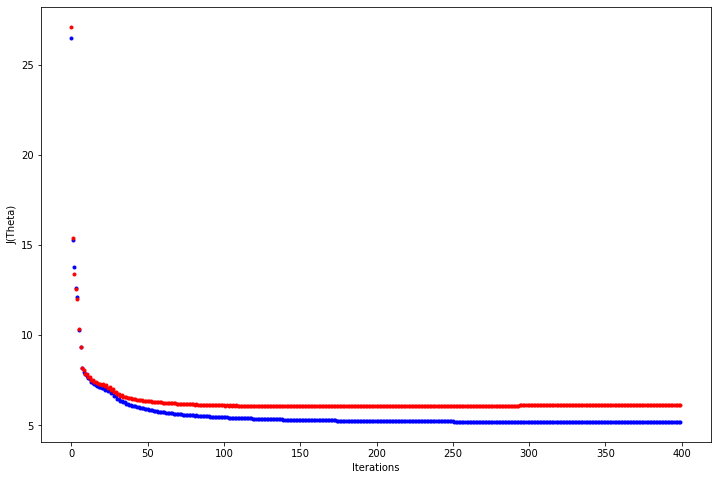

In [ ]:
#그 코드를 바탕으로 training loss plotting 하기.
real_iter = iteration

fig,ax = plt.subplots(figsize=(12,8))

cost_tmp = np.zeros(real_iter)

for i in range(0, real_iter):
  cost_tmp[i] = cost_history[i]


# print(cost_history[1])

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(real_iter),cost_tmp,'b.', color = 'blue')
_=ax.plot(range(real_iter),cost_history2,'b.', color = 'red')

# **2. Plot the accuracy curve [10pt]**

- plot the training accuracy (%) at every iteration of gradient descent using the training data in blue color (the first 6,000 images) [5pt]
- plot the testing accuracy (%) at every iteration of gradient descent using the testing data in red color (the rest 4,000 images) [5pt]
- the both curves should be presented in one figure

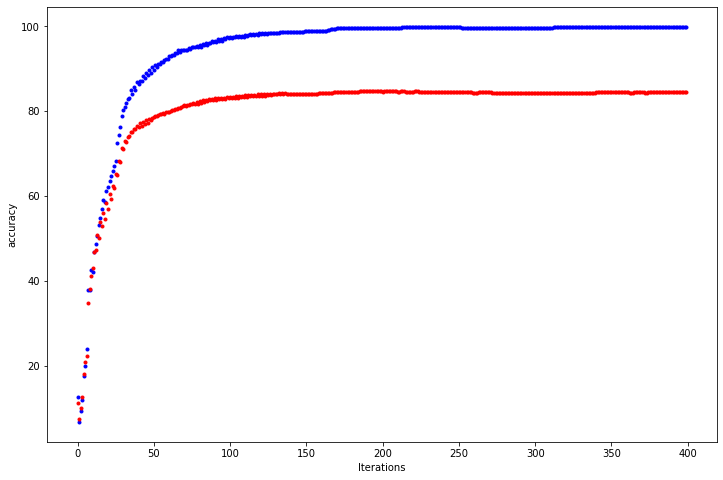

In [ ]:
#그 코드를 바탕으로 training loss plotting 하기.
fig,ax = plt.subplots(figsize=(12,8))

# print(cost_history[1])

ac_tmp = np.zeros(real_iter)

for i in range(0, real_iter):
  ac_tmp[i] = accuracy_history[i]

ax.set_ylabel('accuracy')
ax.set_xlabel('Iterations')
_=ax.plot(range(real_iter),ac_tmp,'b.', color = 'blue')
_=ax.plot(range(real_iter),accuracy_history2,'b.', color = 'red')
# print(ac_tmp)




























# **3. Plot the accuracy value [4pt]**

- print the final training accuracy (%) using the training data (the first 6,000 images) [2pt]
- print the final testing accuracy (%) using the testing data (the rest 4,000 images) [2pt]

In [ ]:
print("final training accuracy using the training data : ", end = '')
print(accuracy_history[-1], end = '%\n')

print("final training accuracy using the testing data : ", end = '')
print(accuracy_history2[-1], end = '%\n')

final training accuracy using the training data : 99.9%
final training accuracy using the testing data : 84.56666666666666%


# **4. Plot the classification example [10pt]**

- present 10 correctly classified testing images with their labels at the title of each sub-figure in 2x5 array [5pt]
- present 10 misclassified testing images with their misclassified labels at the title of each sub-figure in 2x5 array [5pt]

**correctly classified testing images**


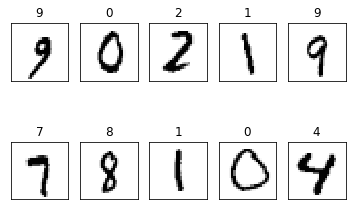




**misclassified testing images**


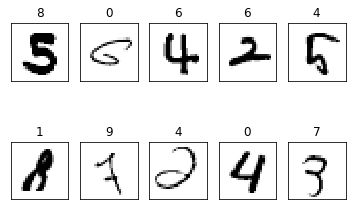

In [ ]:

print("**correctly classified testing images**")
for i in range(10):
    # print(int(right_images_index[i]))
    # print(h_list[int(right_images_index[i])])
    label       = list_label[int(right_images_index[i])]
    im_vector   = list_image[:, int(right_images_index[i])]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(int(right_images_value[i]))
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()
print("\n\n\n**misclassified testing images**")
for i in range(10):
    # print(int(wrong_images_index[i]))
    # print(h_list[int(right_images_index[i])])
    label       = list_label[int(wrong_images_index[i])]
    im_vector   = list_image[:, int(wrong_images_index[i])]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(int(wrong_images_value[i]))
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


































